Let's plot some stats
====================

In [1]:
import python.src.ModularityClassesStats as mdc
import matplotlib.pyplot as plt
from os import path, getcwd
from pprint import pprint
%load_ext autoreload
%autoreload 2
from importlib import reload
%matplotlib inline


In [11]:
file = path.join(getcwd(), '../gephiFbCambridge/similarity08/fbCambridge_sim08_res098_classes.csv')

stats = mdc.modularityClasses2attributes(path2file=file)
pprint(stats)

defaultdict(<function modularityClassesAverageMetrics.<locals>.<lambda> at 0x10cb0fc80>,
            {0: defaultdict(<class 'list'>,
                            {'objectivity': 0.0699720626589812,
                             'sentiment': 0.20084993223537972,
                             'volume': 0.5273679835261287}),
             1: defaultdict(<class 'list'>,
                            {'objectivity': 0.05203713474116597,
                             'sentiment': 0.19142185791996089,
                             'volume': 0.0752415273115155}),
             2: defaultdict(<class 'list'>,
                            {'objectivity': 0.05032967032967033,
                             'sentiment': 0.18004078259432704,
                             'volume': 0.046238539620170264}),
             3: defaultdict(<class 'list'>,
                            {'objectivity': 0.04089449541284404,
                             'sentiment': 0.1752295201667144,
                             'volume': 0

# Sentiment

In [61]:
def plotSentiment():
    
    x = sorted(list(stats.keys()))
    y = [stats[classMod]['sentiment'] for classMod in x]
    
    plt.bar(x, y, align='center', width=0.6, alpha=1., color=((.6, 0, 0.3),))
    
    plt.xticks(range(min(x), max(x)+1))
    plt.yticks(range(int(min(y)), int(max(y)+1)))
    
    plt.xlabel('Modularity class')
    plt.ylabel('average alpha*sentiment')
    
    # width, height
    plt.rcParams['figure.figsize'] = [15., 8.]
    
    plt.show()

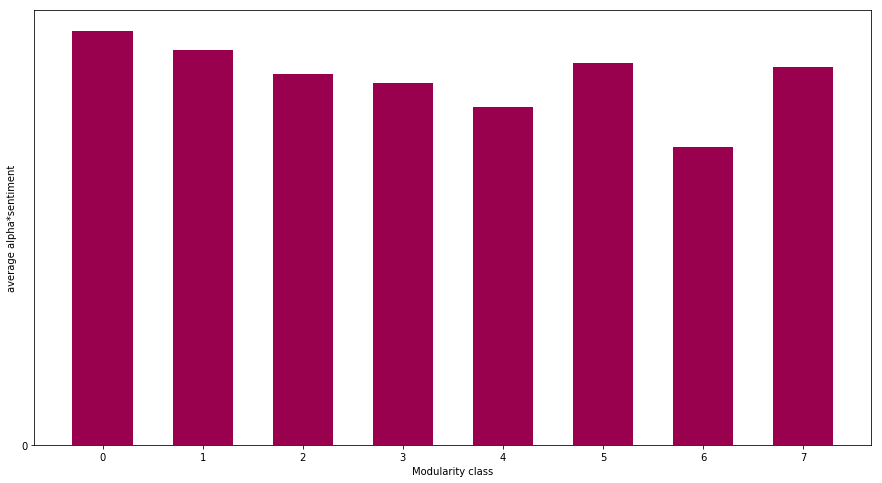

In [64]:
plotSentiment()

# Volume

In [65]:
def plotVolume():
    
    x = sorted(list(stats.keys()))
    y = [stats[classMod]['volume'] for classMod in x]
    
    plt.bar(x, y, align='center', width=0.6, alpha=1., color=((0.2, 0, 0.6),))
    
    plt.xticks(range(min(x), max(x)+1))
    
    plt.xlabel('Modularity class')
    plt.ylabel('average beta*volume')
    
    # width, height
    plt.rcParams['figure.figsize'] = [15., 8.]
    
    plt.show()

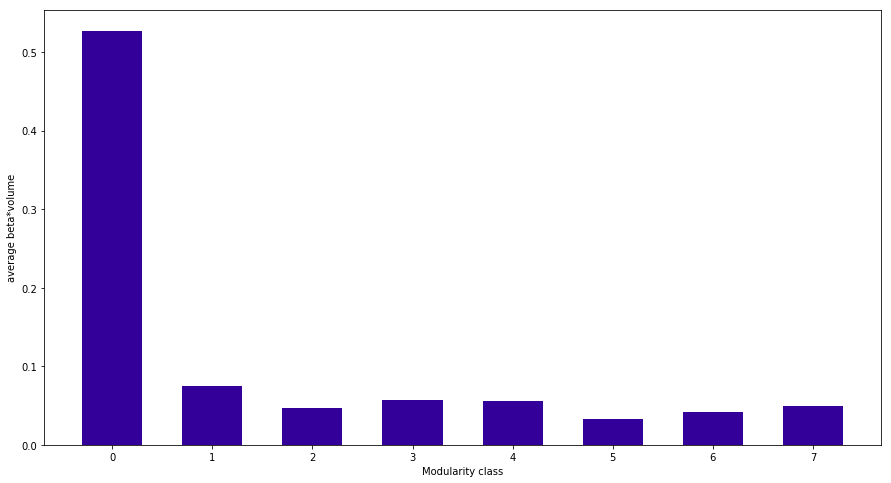

In [66]:
plotVolume()

In [67]:
def plotObjectivity():
    
    x = sorted(list(stats.keys()))
    y = [stats[classMod]['objectivity'] for classMod in x]
    
    plt.bar(x, y, align='center', width=0.6, alpha=1., color=((.3, .45, 0),))
    
    plt.xticks(range(min(x), max(x)+1))
    
    plt.xlabel('Modularity class')
    plt.ylabel('average gamma*objectivity')
    
    # width, height
    plt.rcParams['figure.figsize'] = [15., 8.]
    
    plt.show()

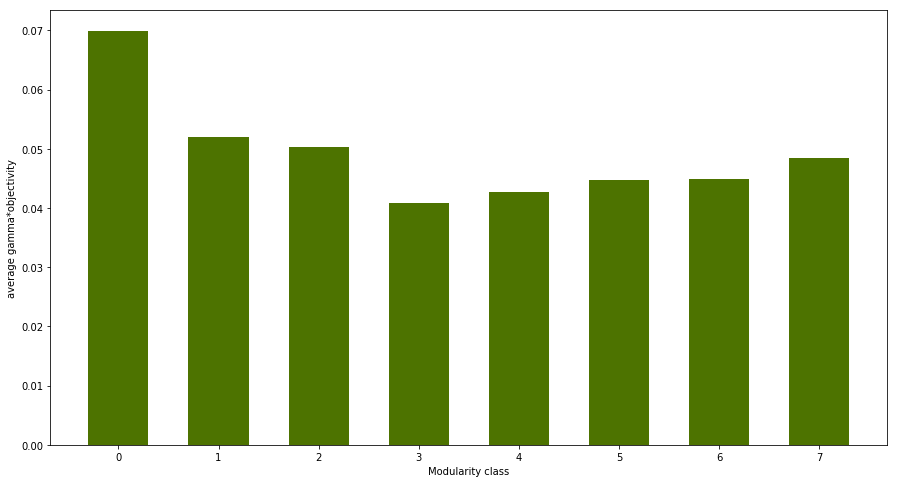

In [68]:
plotObjectivity()

# Grouped bars for a better comparison

In [69]:
def groupedBarsSVO():
    
    x = sorted(list(stats.keys())) # x location for the groups
    ySentiment = [stats[classMod]['sentiment'] for classMod in x]
    yVolume = [stats[classMod]['volume'] for classMod in x]
    yObjectivity = [stats[classMod]['objectivity'] for classMod in x]
    
    fig, ax = plt.subplots()
    width = 0.3
    
    # bars
    sentimentBars = ax.bar(x, ySentiment, width, color=((.6, 0, 0.3),))
    
    volOffset = [el+width for el in x]
    volumeBars = ax.bar(volOffset, yVolume, width, color=((0.2, 0, 0.6),))
    
    objectivOffset = [el+2*width for el in x]
    objectivityBars = ax.bar(objectivOffset, yObjectivity, width, color=((.3, .45, 0),))
    
    # ticks
    ax.set_title('Sentiment, Volume and Objectivity by class')
    plt.xlabel('classes')
        
    xticksOffset = [el + width/2. for el in x]
    ax.set_xticks(xticksOffset)
    ax.set_xticklabels(x)
    
    ax.legend((sentimentBars[0], volumeBars[0], objectivityBars[0]), ('Sentiment', 'Volume', 'Objectivity'))
    
    plt.show()

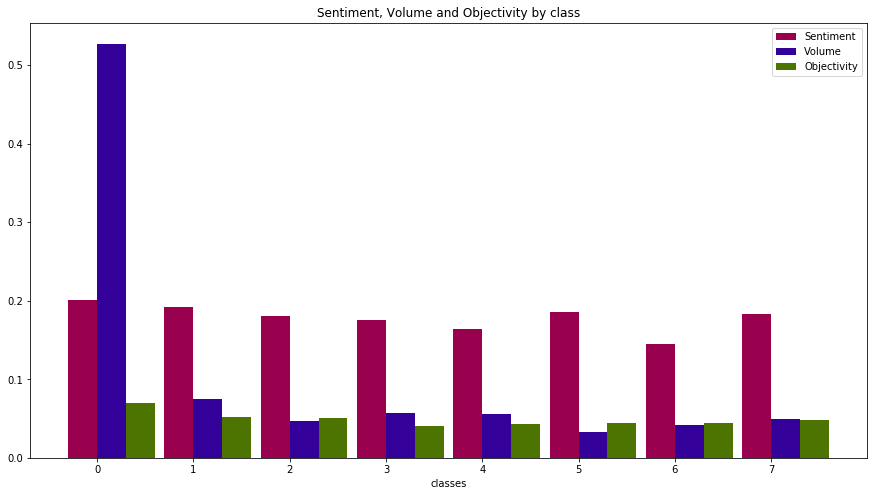

In [70]:
groupedBarsSVO()